In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
UD = pd.read_csv("uberdrives.csv")
UD.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [9]:
print(UD.shape)


(1155, 7)


In [10]:
print(UD.size)

8085


In [12]:
print(UD.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB
None


In [14]:
UD.isnull().any().any()

True

In [15]:
UD.isnull().sum().sum()

502

In [16]:
UD.describe()

,MILES*
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [19]:
df= UD.dropna()
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karachi,Karachi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  653 non-null    object 
 1   END_DATE*    653 non-null    object 
 2   CATEGORY*    653 non-null    object 
 3   START*       653 non-null    object 
 4   STOP*        653 non-null    object 
 5   MILES*       653 non-null    float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 40.8+ KB


In [23]:
#getting the unique start location s of the trips

In [25]:
UD_start= UD['START*'].dropna().unique()
print(UD_start)

['Fort Pierce' 'West Palm Beach' 'Cary' 'Jamaica' 'New York' 'Elmhurst'
 'Midtown' 'East Harlem' 'Flatiron District' 'Midtown East'
 'Hudson Square' 'Lower Manhattan' "Hell's Kitchen" 'Downtown' 'Gulfton'
 'Houston' 'Eagan Park' 'Morrisville' 'Durham' 'Farmington Woods'
 'Whitebridge' 'Lake Wellingborough' 'Fayetteville Street' 'Raleigh'
 'Hazelwood' 'Fairmont' 'Meredith Townes' 'Apex' 'Chapel Hill'
 'Northwoods' 'Edgehill Farms' 'Tanglewood' 'Preston' 'Eastgate'
 'East Elmhurst' 'Jackson Heights' 'Long Island City' 'Katunayaka'
 'Unknown Location' 'Colombo' 'Nugegoda' 'Islamabad' 'R?walpindi'
 'Noorpur Shahan' 'Heritage Pines' 'Westpark Place' 'Waverly Place'
 'Wayne Ridge' 'Weston' 'East Austin' 'West University' 'South Congress'
 'The Drag' 'Congress Ave District' 'Red River District' 'Georgian Acres'
 'North Austin' 'Coxville' 'Convention Center District' 'Austin' 'Katy'
 'Sharpstown' 'Sugar Land' 'Galveston' 'Port Bolivar' 'Washington Avenue'
 'Briar Meadow' 'Latta' 'Jacksonville'

In [27]:
len(UD_start)

176

In [29]:
UD_stop = UD['STOP*'].dropna().unique()
print(UD_stop)

['Fort Pierce' 'West Palm Beach' 'Palm Beach' 'Cary' 'Morrisville'
 'New York' 'Queens' 'East Harlem' 'NoMad' 'Midtown' 'Midtown East'
 'Hudson Square' 'Lower Manhattan' "Hell's Kitchen" 'Queens County'
 'Gulfton' 'Downtown' 'Houston' 'Jamestown Court' 'Durham' 'Whitebridge'
 'Lake Wellingborough' 'Raleigh' 'Umstead' 'Hazelwood' 'Westpark Place'
 'Meredith Townes' 'Leesville Hollow' 'Apex' 'Chapel Hill'
 'Williamsburg Manor' 'Macgregor Downs' 'Edgehill Farms' 'Northwoods'
 'Tanglewood' 'Preston' 'Walnut Terrace' 'Jackson Heights' 'East Elmhurst'
 'Midtown West' 'Long Island City' 'Jamaica' 'Unknown Location' 'Colombo'
 'Nugegoda' 'Katunayaka' 'Islamabad' 'R?walpindi' 'Noorpur Shahan'
 'Heritage Pines' 'Waverly Place' 'Wayne Ridge' 'Depot Historic District'
 'Weston' 'West University' 'South Congress' 'Arts District'
 'Congress Ave District' 'Red River District' 'The Drag'
 'Convention Center District' 'North Austin' 'Coxville' 'Katy' 'Alief'
 'Sharpstown' 'Sugar Land' 'Galveston' 'Port

In [30]:
len(UD_stop)

187

In [36]:
#accounting all the trips starting from san fransico
UD_sanfran = UD[UD['START*']=='San Francisco']
print(UD_sanfran)

          START_DATE*         END_DATE* CATEGORY*         START*       STOP*  \
362  05-09-2016 14:39  05-09-2016 15:06  Business  San Francisco   Palo Alto   
440   6/14/2016 16:09   6/14/2016 16:39  Business  San Francisco  Emeryville   
836  10/19/2016 14:02  10/19/2016 14:31  Business  San Francisco    Berkeley   
917  11-07-2016 19:17  11-07-2016 19:57  Business  San Francisco    Berkeley   
919  11-08-2016 12:16  11-08-2016 12:49  Business  San Francisco    Berkeley   
927  11-09-2016 18:40  11-09-2016 19:17  Business  San Francisco     Oakland   
933  11-10-2016 15:17  11-10-2016 15:22  Business  San Francisco     Oakland   
966  11/15/2016 20:44  11/15/2016 21:00  Business  San Francisco    Berkeley   

     MILES*         PURPOSE*  
362    20.5  Between Offices  
440    11.6          Meeting  
836    10.8              NaN  
917    13.2  Between Offices  
919    11.3          Meeting  
927    12.7   Customer Visit  
933     9.9   Temporary Site  
966    11.8   Temporary Site  


In [37]:
#getting the top 4 most starting spots for uber drivers

In [39]:
UD['START*'].value_counts().head(4)

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Name: START*, dtype: int64

In [43]:
#FInding out the purose of trips 
UD['PURPOSE*'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

In [44]:
#comparing distance vs PUrpose of trips 

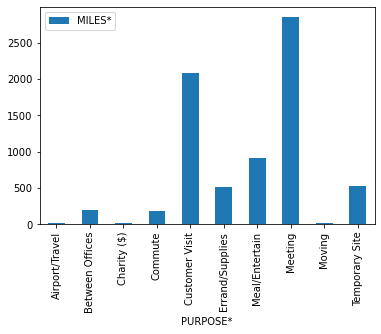

                 MILES*
PURPOSE*               
Airport/Travel     16.5
Between Offices   197.0
Charity ($)        15.1
Commute           180.2
Customer Visit   2089.5
Errand/Supplies   508.0
Meal/Entertain    911.7
Meeting          2851.3
Moving             18.2
Temporary Site    523.7
 Maximum Miles are travelled for Meeting Purpose


In [45]:
barGraph = pd.DataFrame(UD['MILES*'].groupby(UD['PURPOSE*']).sum())
barGraph.plot(kind = 'bar')
plt.show()
print (barGraph)
print(" Maximum Miles are travelled for Meeting Purpose")

In [46]:
#Purpose and the total distance travelled for that particular Purpose
UD.groupby('PURPOSE*').sum()['MILES*']

PURPOSE*
Airport/Travel       16.5
Between Offices     197.0
Charity ($)          15.1
Commute             180.2
Customer Visit     2089.5
Errand/Supplies     508.0
Meal/Entertain      911.7
Meeting            2851.3
Moving               18.2
Temporary Site      523.7
Name: MILES*, dtype: float64

C:\Users\abhip\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Business    1078
Personal      77
Name: CATEGORY*, dtype: int64

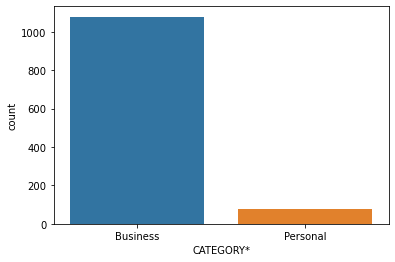

In [48]:
#PLot showing count of trips VS Category of trips
sns.countplot(UD['CATEGORY*'])
UD['CATEGORY*'].value_counts()